# Απαλλακτική Εργασία 2023-2024
## Αναλυτική Δεδομένων και Μηχανική Μάθηση

**Επιμέλεια Εργασίας:**

- Ανδριανόπουλος Βασίλειος, ΜΠΚΕΔ2303
- Τσουτσουλιανούδης Γεώργιος, ΜΠΚΕΔ2347

---

### Σκοπός της Εργασίας

Η εξοικείωση με ένα πραγματικό σύνολο δεδομένων και η εφαρμογή τεχνικών Αναλυτικής Δεδομένων & Μηχανικής Μάθησης πάνω σε αυτό. 

### Επιλογή Δεδομένων

- **MovieLens small Dataset:** Κριτικές χρηστών σε κινηματογραφικές ταινίες.

### Περιεχόμενα

1. **Προπαρασκευή δεδομένων (Data preprocessing)**
   - Καθαρισμός, μετασχηματισμός, και απλή στατιστική ανάλυση.

2. **Συσταδοποίηση (Clustering)**
   - Εξοικείωση με το dataset και ανακάλυψη προτύπων μέσω τεχνικών συσταδοποίησης.

3. **Ταξινόμηση (Classification/Regression)**
   - Χρήση μοντέλων ταξινόμησης για ανάθεση ενός αντικειμένου σε προκαθορισμένες κατηγορίες.

4. **Σύνοψη**
   - Παρατηρήσεις και βασικά συμπεράσματα από την εργασία.


In [15]:
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('dark_background')

## Read Dataset
#### Name: "MovieLens small Dataset" (https://grouplens.org/datasets/movielens/latest/)

In [16]:
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
tags = pd.read_csv('tags.csv')

# Καθαρισμός και Κανονικοποίηση Δεδομένων

Σε αυτό το στάδιο της επεξεργασίας των δεδομένων, θα προχωρήσουμε με το πρώτο μέρος.

## Α. Καθαρισμός Δεδομένων

Ο καθαρισμός των δεδομένων περιλαμβάνει τα εξής βήματα:

1. **Εντοπισμός και Διόρθωση Ελλιπών ή Εσφαλμένων Τιμών:** Θα προχωρήσουμε με την εύρεση κενών τιμών στα datasets movies,ratings και tags. Για την εύρεση εσφαλμένων τιμών, θα πρέπει να δουλέψουμε μεμονωμένα με το κάθε dataset. 

    * **Εντοπισμός Εσφαλμένων Τιμών στο ratings dataset:** Εδώ αρκεί να ελέγξουμε αν όλες οι τιμές άνήκουν στο πεδίο τιμών [0.5,5]
    * **Εντοπισμός Εσφαλμένων Τιμών στο movies dataset:** Εδώ θα ελέγξουμε:
        - Αν υπάρχουν διπλότυπα moviesid
        - Έλεγχος στο έτος κυκλοφορίας της ταινίας (θα ελέγξουμε την παρένθεση του τίτλου
        - θα ελέγξουμε για τυχόν ασυνήθιστα tags, όπως κενά κελιά ή φράσεις όπως (no genres listed).
    * **Εντοπισμός Εσφαλμένων Τιμών στο tags dataset:** Εδώ θα ελέγξουμε:
        - Έλεγχος για διπλότυπες καταχωρήσεις, λαμβάνοντας υπόψη τον συνδυασμό userId, movieId και tag ως μοναδικό αναγνωριστικό για κάθε καταχώρηση.
        

In [17]:

missing_values_tags = tags.isnull().sum()

print("+"*20+" Movies CSV Files "+"+"*20)

# Ελέγχουμε για ελλιπείς τιμές
missing_values_movies = movies.isnull().sum()

print("Για την κάθε στήλη στο movies.csv τα κελιά που είναι κενά είναι:\n", missing_values_movies)

# Έλεγχος για διπλότυπων movie id
duplicate_movieIds = movies['movieId'].duplicated().sum()
print(f"\n Βρέθηκαν {duplicate_movieIds} ταινίες με το ίδιο movie id.")

# Έλεγχος για ταινίες χωρίς καταχωρημένη ημερομηνίες έκδοσης
inconsistent_titles = movies[~movies['title'].str.endswith(')')]
print(f"\n Βρέθηκαν {len(inconsistent_titles)} ταινίες χωρίς καταχορυμένο έτος.")

# Έλεγχος για ταινίες χωρίς καταχορυμένα είδη
unusual_genres = movies[movies['genres'] == '(no genres listed)']
print(f"\n Βρέθηκαν {len(unusual_genres)} ταινίες χωρίς είδος (genre).\n")


print("+"*20+" Ratings CSV Files "+"+"*20)

missing_values_ratings = ratings.isnull().sum()

print("\n Για την κάθε στήλη στο ratings.csv τα κελιά που είναι κενά είναι:\n", missing_values_ratings)

# Ελέγχουμε τις τιμές που είναι εκτός οριακών τιμών στο ratings αρχείο
invalid_ratings = ratings[(ratings['rating'] < 0.5) | (ratings['rating'] > 5)]
print(f"\n Βρέθηκαν {len(invalid_ratings)} κριτικές εκτός του πεδίου τιμών (0.5 εώς 5).\n")

# Ελέγχουμε αν κάποιο rating έχει movieid που δεν ανήκει στο movies dataset
ratings_with_invalid_movieId = ratings[~ratings['movieId'].isin(movies['movieId'])]
print(f" Βρέθηκαν {len(ratings_with_invalid_movieId)} κριτικές με εσσφαλμένο movieid.\n")


print("+"*20+" Tags CSV Files "+"+"*20)

print("\n Για την κάθε στήλη στο tags.csv τα κελιά που είναι κενά είναι:\n", missing_values_tags)

# Check for duplicate entries in the tags dataset
duplicates_tags = tags.duplicated(subset=['userId', 'movieId', 'tag']).sum()
print(f" Βρέθηκαν {duplicates_tags} διπλότυπα tags.\n")

# Ελέγχουμε αν κάποιο tag έχει movieid που δεν ανήκει στο movies dataset
tags_with_invalid_movieId = tags[~tags['movieId'].isin(movies['movieId'])]
print(f" Βρέθηκαν {len(tags_with_invalid_movieId)} tags με εσφαλμένο movieid")


++++++++++++++++++++ Movies CSV Files ++++++++++++++++++++
Για την κάθε στήλη στο movies.csv τα κελιά που είναι κενά είναι:
 movieId    0
title      0
genres     0
dtype: int64

 Βρέθηκαν 0 ταινίες με το ίδιο movie id.

 Βρέθηκαν 23 ταινίες χωρίς καταχορυμένο έτος.

 Βρέθηκαν 34 ταινίες χωρίς είδος (genre).

++++++++++++++++++++ Ratings CSV Files ++++++++++++++++++++

 Για την κάθε στήλη στο ratings.csv τα κελιά που είναι κενά είναι:
 userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

 Βρέθηκαν 0 κριτικές εκτός του πεδίου τιμών (0.5 εώς 5).

 Βρέθηκαν 0 κριτικές με εσσφαλμένο movieid.

++++++++++++++++++++ Tags CSV Files ++++++++++++++++++++

 Για την κάθε στήλη στο tags.csv τα κελιά που είναι κενά είναι:
 userId       0
movieId      0
tag          0
timestamp    0
dtype: int64
 Βρέθηκαν 0 διπλότυπα tags.

 Βρέθηκαν 0 tags με εσφαλμένο movieid


Επομένως, στο movies dataset επιλέγουμε να αφαιρέσουμε τις ταινίες που δεν έχουν το έτος ή το είδος της ταινίας

In [18]:
# Remove movies without a year in the title (assuming year is at the end in parentheses)
movies_with_year = movies[movies['title'].str.endswith(')')]

# Remove movies with "(no genres listed)" as their genre
movies_with_genre = movies_with_year[movies_with_year['genres'] != '(no genres listed)']

# Save the cleaned DataFrame to a new CSV file
movies_with_genre.to_csv('movies_cleaned.csv', index=False)

print("Οι ταινίες χωρίς genre ή χωρίς έτος αφαιρέθηκαν επιτυχώς.")
      
print("Το αρχείο 'movies_cleaned.csv' αποθηκεύτηκε επιτυχώς.")


Οι ταινίες χωρίς genre ή χωρίς έτος αφαιρέθηκαν επιτυχώς.
Το αρχείο 'movies_cleaned.csv' αποθηκεύτηκε επιτυχώς.


Αφού αφαιρέσαμε τις ταινίες εκείνες που δεν έχουν έτος ή είδος, πρέπει να αφαιρέσουμε και τα ratings ή τα tags που αντιστοιχούν σε αυτές τις ταινίες

In [19]:
movies_cleaned = pd.read_csv('movies.csv')

# Step 2: Remove the entries from ratings and tags that correspond to the filtered out movies
ratings_cleaned = ratings[ratings['movieId'].isin(movies_cleaned['movieId'])]
tags_cleaned = tags[tags['movieId'].isin(movies_cleaned['movieId'])]


ratings_cleaned.to_csv('ratings_cleaned.csv', index=False)
tags_cleaned.to_csv('tags_cleaned.csv', index=False)

print("Οι κριτικές και τα tags που έχουν movieid που δεν ανήκει στο movies dataset αφαιρέθηκαν επιτυχώς.\n")
      
print("Το αρχείο 'ratings_cleaned.csv' αποθηκεύτηκε επιτυχώς.")
print("Το αρχείο 'tags_cleaned.csv' αποθηκεύτηκε επιτυχώς.")

Οι κριτικές και τα tags που έχουν movieid που δεν ανήκει στο movies dataset αφαιρέθηκαν επιτυχώς.

Το αρχείο 'ratings_cleaned.csv' αποθηκεύτηκε επιτυχώς.
Το αρχείο 'tags_cleaned.csv' αποθηκεύτηκε επιτυχώς.


# Βασική Στατιστική Ανάλυση
Σαν βασική ανάλυση, θα χρειαστεί πρώτα να ενώσουμε τα datasets των ταινιών και των κριτικών σε ένα, με βάση το movieId, μιας και το dataset των tags δεν αφορά όλα τα moviesIds και θα καταλήξουμε να έχουμε κενά κελιά. Στη συνέχεια, μπορούμε να προσθέσουμε μια επιπλέον στήλη (αυτή του έτους κυκλοφορίας της ταινίας) ωστέ να κάνουμε στατιστική ανάλυση βάσει του έτους κυκλοφορίας.

Επίσης, μπορούμε να εντάξουμε και την ανάλυση των συνολικών κριτικών με βάση τη βαθμολογία τους. 

In [20]:

movies = pd.read_csv('movies_cleaned.csv')
ratings = pd.read_csv('ratings_cleaned.csv')

movies['year'] = movies['title'].str.extract(r'\((\d{4})\)')

merged_df = pd.merge(ratings, movies, on='movieId', how='inner')


merged_df.to_csv('merged_filtered_data.csv', index=False)


print(merged_df.head())


   userId  movieId  rating  timestamp                        title  \
0       1        1     4.0  964982703             Toy Story (1995)   
1       1        3     4.0  964981247      Grumpier Old Men (1995)   
2       1        6     4.0  964982224                  Heat (1995)   
3       1       47     5.0  964983815  Seven (a.k.a. Se7en) (1995)   
4       1       50     5.0  964982931   Usual Suspects, The (1995)   

                                        genres  year  
0  Adventure|Animation|Children|Comedy|Fantasy  1995  
1                               Comedy|Romance  1995  
2                        Action|Crime|Thriller  1995  
3                             Mystery|Thriller  1995  
4                       Crime|Mystery|Thriller  1995  


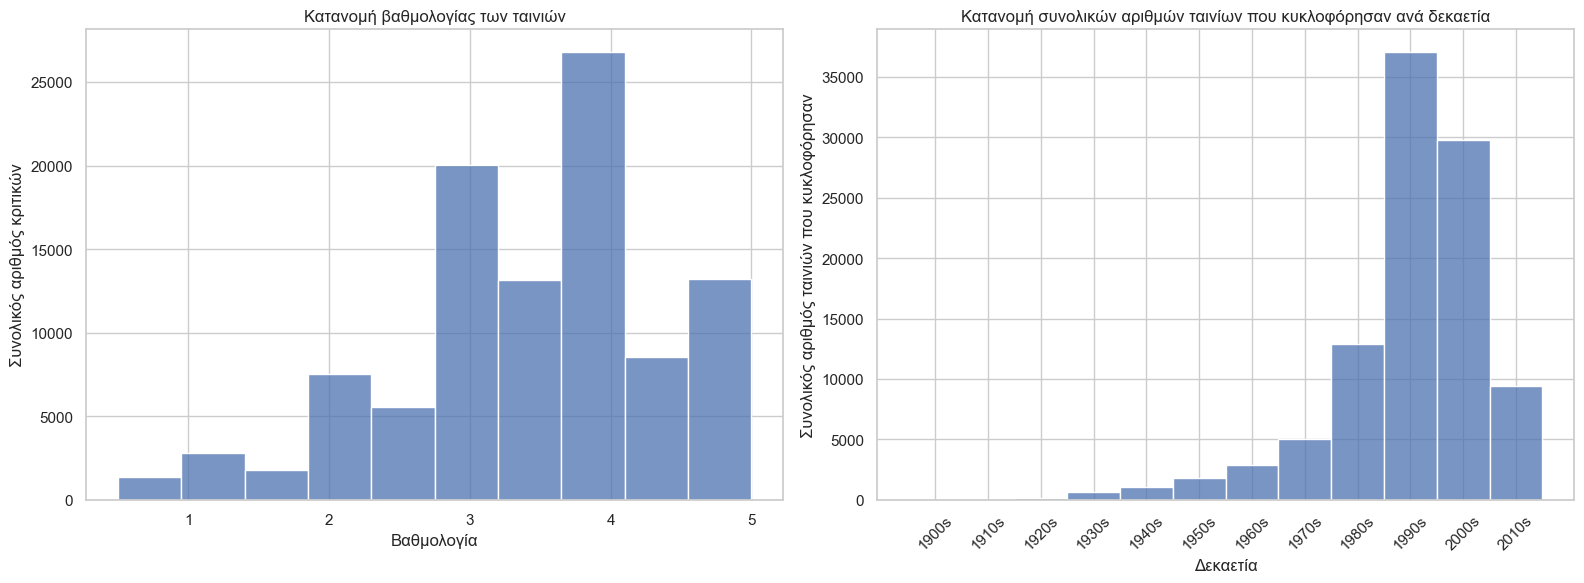

In [21]:

data = pd.read_csv('merged_filtered_data.csv')

# Ορίζουμε το style των Plots. Το 'whitegrid' σημαίνει πως θα προσθέσει grid.
sns.set(style="whitegrid")


# Θέλουμε να εμφανίσουμε τις ταινίες ανα χρονιά. Θα δουλέψουμε ανά δεκαετία για να είναι πιο εύκολα αναγνώσιμο το διάγραμμα.

# Υπολογίζουμε την αρχική την ελάχιστη και την μέγιστη δεκαετία
decade_start = data['year'].min() // 10 * 10
decade_end = data['year'].max() // 10 * 10 + 10  # Προσθέτουμε 10 για να συμπεριλάβουμε τη τελευταία δεκαετία


bins = range(decade_start, decade_end + 10, 10)  

# Φτιάχνουμε τις ετικέτες για τη κάθε δεκαετία (προσθέτει το s)
labels = [f"{i}s" for i in range(decade_start, decade_end, 10)]

# Αποθηκεύουμε σε καινούρια στήλη που την ονομάζουμε 'refined_decade' στο dataset
data['refined_decade'] = pd.cut(data['year'], bins=bins, labels=labels, right=False)

# Δημιουργούμε τα plots (Θα κάνουμε print 2 plots)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  

# Plot 1: Το διάγραμμα εμφάνισης συνολικών αριθμών κριτικών ανά βαθμολογία
sns.histplot(data=data, x="rating", bins=10, kde=False, ax=axes[0])
axes[0].set_title('Κατανομή βαθμολογίας των ταινιών')
axes[0].set_xlabel('Βαθμολογία')
axes[0].set_ylabel('Συνολικός αριθμός κριτικών')

# Plot 2: Το διάγραμμα εμφάνισης συνολικών αριθμών ταινίων που κυκλοφόρησαν ανά δεκαετία
sns.histplot(data=data, x="refined_decade", kde=False, ax=axes[1], discrete=True)
axes[1].set_title('Κατανομή συνολικών αριθμών ταινίων που κυκλοφόρησαν ανά δεκαετία')
axes[1].set_xlabel('Δεκαετία')
axes[1].set_ylabel('Συνολικός αριθμός ταινιών που κυκλοφόρησαν')

plt.xticks(rotation=45)
plt.tight_layout()  
plt.show()  


# Προχωρημένη Στατιστική Ανάλυση
Σαν προχωρημένη ανάλυση, μπορούμε να ομαδοποιήσουμε τα δεδομένα κατά τίτλο ταινίας και να υπολογίσουμε την πιο δημοφιλή ταινία με βάση το συνολικό αριθμό κριτικών και τη μέγιστη μέση βαθμολόγηση

In [22]:

# Ομαδοποιούμε τα δεδομένα κατά τίτλο ταινίας, υπολογίζοντας τη μέση βαθμολογία και τον συνολικό αριθμό  βαθμολογιών για κάθε ταινία. 
# Αυτό το βήμα μάς βοηθά να κατανοήσουμε πόσο καλά βαθμολογείται κάθε ταινία και πόσες βαθμολογίες έχει λάβει.

movie_stats = data.groupby('title').agg({
    'rating': ['mean', 'count']
}).reset_index()
movie_stats.columns = ['Τίτλος Ταινίας', 'Μέση βαθμολόγηση', 'Συνολικές κριτικές']

# Ορίζουμε ένα όριο για τις δημοφιλείς ταινίες 
threshold = movie_stats['Συνολικές κριτικές'].quantile(0.9)
popular_movies = movie_stats[movie_stats['Συνολικές κριτικές'] > threshold]

# Τις ταξινομούμε
top_rated_popular_movies = popular_movies.sort_values(by='Μέση βαθμολόγηση', ascending=False).head(10)

print("Οι 10 ταινίες με τη μεγαλύτερη βαθμολογία και τις περισσότερες κριτικές είναι:")
print(top_rated_popular_movies[['Τίτλος Ταινίας', 'Μέση βαθμολόγηση', 'Συνολικές κριτικές']])


Οι 10 ταινίες με τη μεγαλύτερη βαθμολογία και τις περισσότερες κριτικές είναι:
                                         Τίτλος Ταινίας  Μέση βαθμολόγηση  \
7557                   Shawshank Redemption, The (1994)          4.429022   
6571                     Philadelphia Story, The (1940)          4.310345   
4948                          Lawrence of Arabia (1962)          4.300000   
3998                                 Hoop Dreams (1994)          4.293103   
3483                              Godfather, The (1972)          4.289062   
2997                                  Fight Club (1999)          4.272936   
1951                              Cool Hand Luke (1967)          4.271930   
2518  Dr. Strangelove or: How I Learned to Stop Worr...          4.268041   
6965                                 Rear Window (1954)          4.261905   
3484                     Godfather: Part II, The (1974)          4.259690   

      Συνολικές κριτικές  
7557                 317  
6571               

## Clustering

Μπορούμε να επιλέξουμε μεταξύ 2 κατευθύνσεών:

1. Ταινίες: Μπορούμε να ομαδοποιήσουμε ταινίες με βάση τα είδη τους και τις μέσες βαθμολογίες τους. Αυτή η προσέγγιση στοχεύει στην εύρεση συστάδων από ταινίες που να είναι παρόμοιες μεταξύ τους. 

2. Users: Μπορούμε να ομαδοποιήσουμε τους χρήστες με βάση τις προτιμήσεις τους. Αυτό μπορεί να γίνει από τις βαθμολογίες που δίνουν σε διαφορετικά είδη ταινιών. Για αυτήν την προσέγγιση, θα πρέπει να συγκεντρώνουμε δεδομένα για να κατανοήσουμε τις προτιμήσεις κάθε χρήστη σε διάφορα είδη ταινιών, δημιουργώντας πιθανώς χαρακτηριστικά που αντιπροσωπεύουν τη μέση βαθμολογία κάθε είδους από έναν χρήστη.

**Θα επιχειρήσουμε να πάμε στη δεύτερη κατεύθυνση**

# Βασικό Clustering

Αρχίκα, θα προσπαθήσουμε να μοντελοποιήσουμε το πρόβλημα ξεκινώντας με μια απλή στατιστική ανάλυση. Αυτή αφορά την αποτύπωση των ειδών με το μεγαλύτερο πλήθος ταινιών.


In [23]:

all_the_genres = set()  # Θέλουμε Set για να μην υπάρξουν επαναλήψεις
for genre_list in data['genres'].str.split('|').values:  # Κάθε στοιχείο είναι της μορφής 'Fantasy|Comedy|Drama' άρα τα διαχωρίζουμε ανάλογα το '|'
    all_the_genres = all_the_genres.union(set(genre_list))  # Κρατάμε μόνο μία φορά τα στοιχεία (genres)


def count_genre_reveal(df, the_column_with_genres, list_of_all_genres):
    count_of_each_genre = {}  # θα μετράμε πόσες φορές εμφανίστηκε η κάθε κατηγορία
    for genre in list_of_all_genres:  
        count_of_each_genre[genre] = 0 # φτιάχνουμε ένα λεξικό της μορφή {'Drama': 0, 'Comedy': 0 Κλπ}
    
    for genre_list in df[the_column_with_genres].str.split('|'):  # Το διαχωρίζουμε από το '|'
        for genre in genre_list:  
            count_of_each_genre[genre] += 1  

    # Τα ταξινομούμε σε φθίνουσα σειρά (ώστε να εμφανίζει πρώτα το μεγαλύτερο προς το μικρότερο)
    sorted_genres = []
    for genre, count in count_of_each_genre.items():
        sorted_genres.append([genre, count])  
    sorted_genres.sort(key=lambda x: x[1], reverse=True)  
    return sorted_genres, count_of_each_genre  



genre_counts, dont_need_this = count_genre_reveal(data, 'genres', all_the_genres)
print(genre_counts)  


[['Drama', 41923], ['Comedy', 39049], ['Action', 30623], ['Thriller', 26446], ['Adventure', 24157], ['Romance', 18124], ['Sci-Fi', 17233], ['Crime', 16679], ['Fantasy', 11831], ['Children', 9207], ['Mystery', 7674], ['Horror', 7287], ['Animation', 6982], ['War', 4858], ['IMAX', 4145], ['Musical', 4138], ['Western', 1930], ['Documentary', 1219], ['Film-Noir', 870]]


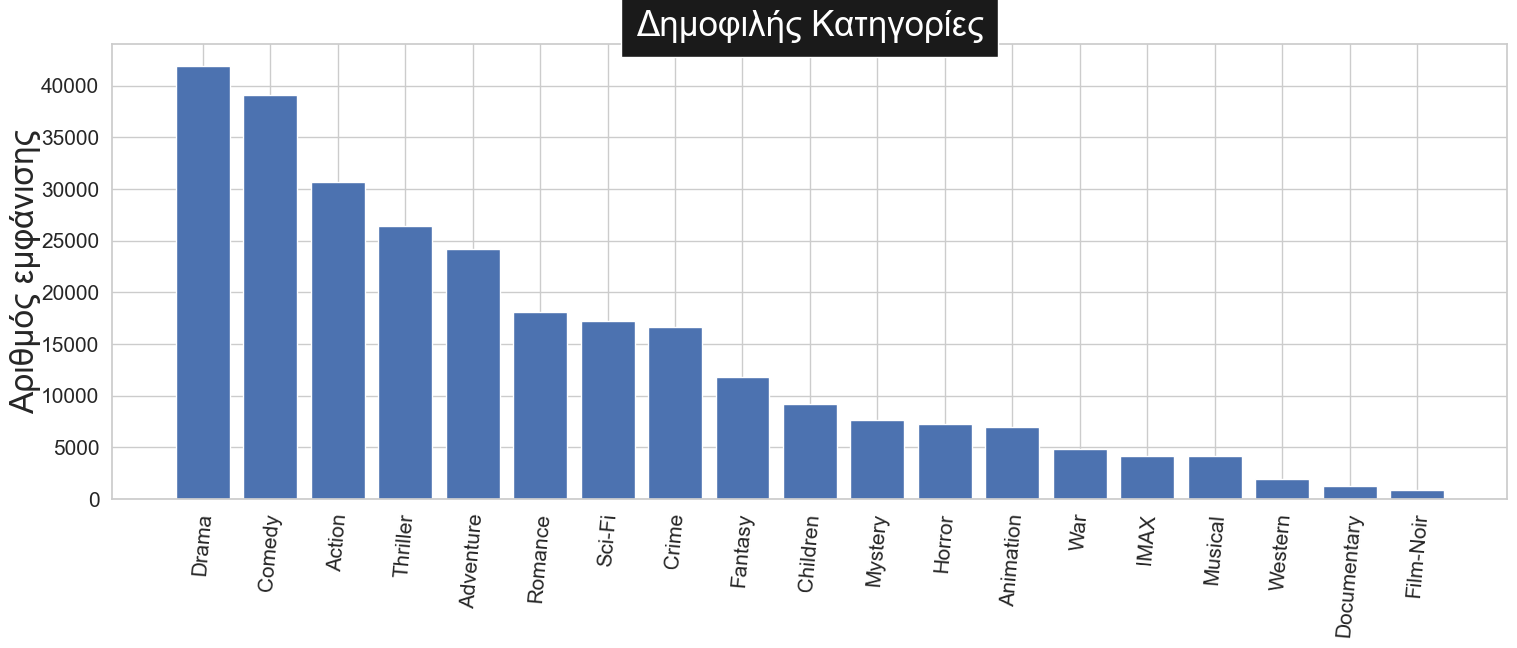

In [24]:

fig = plt.figure(1, figsize=(18,13))
ax2 = fig.add_subplot(2,1,2)
y_axis = [i[1] for i in genre_counts] # παίρνουμε μόνο τον αριθμό εμφάνισης της κάθε κατηγορίας για τον άξονα y
x_axis = [k for k,i in enumerate(genre_counts)]  
x_label = [i[0] for i in genre_counts] # παίρνουμε μόνο το όνομα της κάθε κατηγορίας 
plt.xticks(rotation=85, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x_axis, x_label)
plt.ylabel("Αριθμός εμφάνισης", fontsize = 24, labelpad = 0)
ax2.bar(x_axis, y_axis, align = 'center')
plt.title("Δημοφιλής Κατηγορίες",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 25)
plt.show()

In [25]:

data = pd.read_csv('merged_filtered_data.csv')

# Παίρνουμε μόνος τις ταινίες που είναι thriller ή adventure
thriller_data = data[data['genres'].str.contains('Thriller')]
adventure_data = data[data['genres'].str.contains('Adventure')]

# Υπολογίζουμε το μέσο rating από τον κάθε χρήστη για τις ταινίες thriller
average_ratings_thriller = thriller_data.groupby('userId')['rating'].mean().reset_index()
average_ratings_thriller.rename(columns={'rating': 'averageRatingThriller'}, inplace=True)

# Υπολογίζουμε το μέσο rating από τον κάθε χρήστη για τις ταινίες adventure
average_ratings_adventure = adventure_data.groupby('userId')['rating'].mean().reset_index()
average_ratings_adventure.rename(columns={'rating': 'averageRatingAdventure'}, inplace=True)

# Κάνουμε merge τα 2 datasets 
average_ratings_merged = pd.merge(average_ratings_thriller, average_ratings_adventure, on='userId', how='outer')


print(average_ratings_merged.head())


   userId  averageRatingThriller  averageRatingAdventure
0       1               4.145455                4.388235
1       2               3.700000                4.166667
2       3               4.142857                2.727273
3       4               3.552632                3.655172
4       5               3.555556                3.250000


Θα πρέπει να αποφύγουμε τυχόν περιπτώσεις που στους χρήστες αρέσουν και τα 2 είδη ισότιμα.

In [26]:
# Επιλέγουμε τις μέσες βαθμολογίες για ταινίες θρίλερ που είναι μικρότερες από 2.9 και μεγαλύτερες από 2.5 για τις ταινίες περιπέτειας.
# ή τις μέσες βαθμολογίες για τις ταινίες περιπέτειας που είναι μικρότερη από 3.2 και μεγαλύτερες από 2.5 για τις ταινίες θρίλερ
def bias_genre_rating_dataset(genre_ratings, score_limit_1, score_limit_2):
    biased_dataset = genre_ratings[((genre_ratings['averageRatingThriller'] < score_limit_1 - 0.2) & (genre_ratings['averageRatingAdventure'] > score_limit_2)) | ((genre_ratings['averageRatingAdventure'] < score_limit_1) & (genre_ratings['averageRatingThriller'] > score_limit_2))]
    biased_dataset = pd.concat([biased_dataset[:300], genre_ratings[:2]])
    biased_dataset = pd.DataFrame(biased_dataset.to_records())
    return biased_dataset

biased_dataset = bias_genre_rating_dataset(average_ratings_merged, 3.2, 2.5)

print( "Number of records: ", len(biased_dataset))
biased_dataset.head()

Number of records:  140


,index,userId,averageRatingThriller,averageRatingAdventure
0,2,3,4.142857,2.727273
1,8,9,2.545455,3.800000
2,11,12,4.000000,3.000000
3,18,19,2.546798,2.815287
4,19,20,2.729730,3.441860


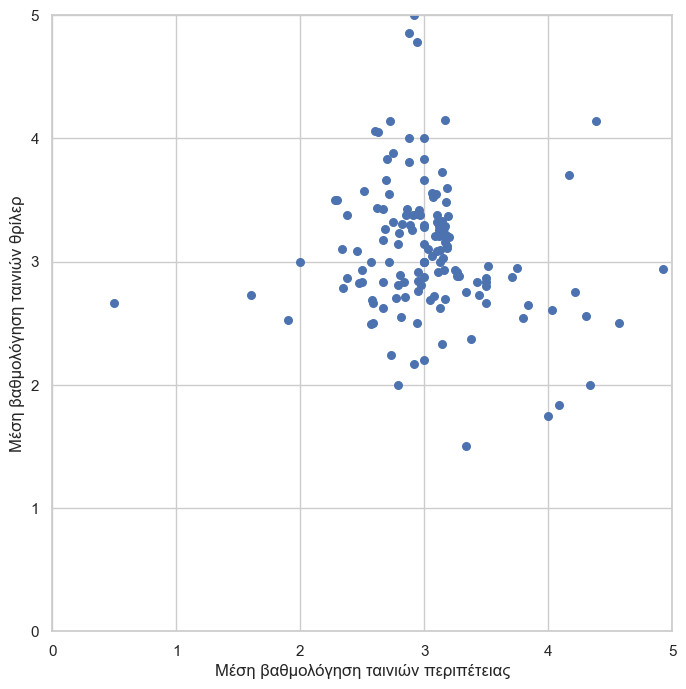

In [27]:
# Εισαγωγή δεδομένων και ορίζουμε τις ετικέτες των αξόνων 
x_data = biased_dataset['averageRatingAdventure']
y_data = biased_dataset['averageRatingThriller']
x_label = 'Μέση βαθμολόγηση ταινιών περιπέτειας'
y_label = 'Μέση βαθμολόγηση ταινιών θρίλερ'

# Δημιουργούμε το σχηματικό board 
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

# Ορίζουμε τα όρια των αξόνων x και y
plt.xlim(0, 5)
plt.ylim(0, 5)

# Ορίζουμε τις ετικέτες των αξόνων x και y
ax.set_xlabel(x_label)
ax.set_ylabel(y_label)

# Σχεδιάζουμε το διάγραμμα διασποράς με μέγεθος 30
ax.scatter(x_data, y_data, s=30)


plt.show()


Πώς θα φαινόταν αν χωρίζαμε το δείγμα σε δύο ομάδες χρησιμοποιώντας k-means;

In [29]:
# Μετατρέπουμε το dataset σε λίστα
X = biased_dataset[['averageRatingAdventure','averageRatingThriller']].values

To silhouette score για το clutering με k=2 είναι:  0.301181303492466


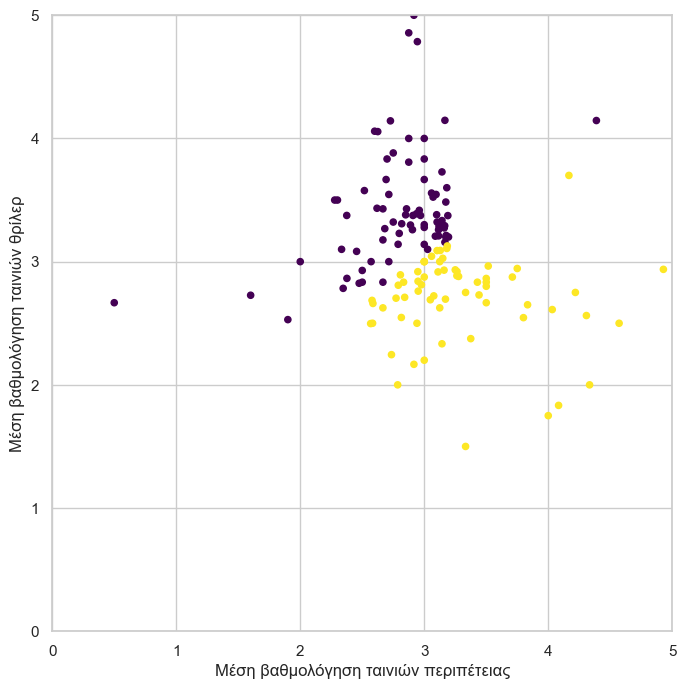

In [30]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Δημιουργία το kmeans με 2 ομάδες
kmeans_1 = KMeans(n_clusters=2, random_state=42)

# Εκπαίδευση του μοντέλου KMeans και πρόβλεψη των ομάδων για τα δεδομένα X
predictions = kmeans_1.fit_predict(X)

# Δημιουργία σχήματος
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
plt.xlim(0, 5)
plt.ylim(0, 5)
ax.set_xlabel('Μέση βαθμολόγηση ταινιών περιπέτειας')
ax.set_ylabel('Μέση βαθμολόγηση ταινιών θρίλερ')


clustered = pd.concat([biased_dataset.reset_index(), pd.DataFrame({'group':predictions})], axis=1)
plt.scatter(clustered['averageRatingAdventure'], clustered['averageRatingThriller'], c=clustered['group'], s=20, cmap='viridis')

silhouette_avg = silhouette_score(X, predictions)

print("To silhouette score για το clutering με k=2 είναι: ", silhouette_avg)

Μπορούμε να δούμε ότι οι ομάδες βασίζονται κυρίως στο πώς κάθε άτομο βαθμολόγησε τις thriller ταινίες και πώς τις ταινίες περιπέτειας. Εάν η μέση βαθμολογία τους για τις ταινίες thriller είναι πάνω από 2.4 αστέρια, τότε ανήκουν σε μία ομάδα. Διαφορετικά, ανήκουν στην άλλη ομάδα

Τι θα γινόταν αν τα χωρίσουμε σε τρεις ομάδες;

To silhouette score για το clutering με k=3 είναι:  0.3288604121702585


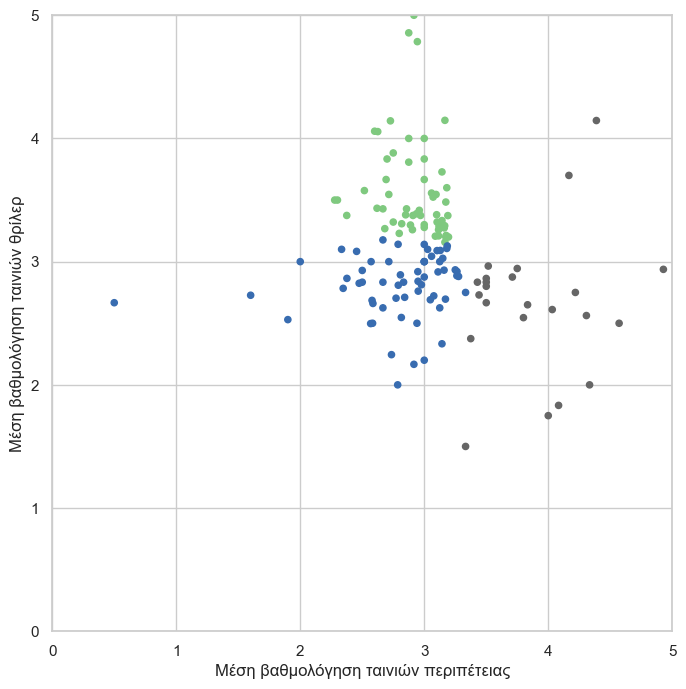

In [31]:

kmeans_1 = KMeans(n_clusters=3, random_state=42)

predictions = kmeans_1.fit_predict(X)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
plt.xlim(0, 5)
plt.ylim(0, 5)
ax.set_xlabel('Μέση βαθμολόγηση ταινιών περιπέτειας')
ax.set_ylabel('Μέση βαθμολόγηση ταινιών θρίλερ')


clustered = pd.concat([biased_dataset.reset_index(), pd.DataFrame({'group':predictions})], axis=1)
plt.scatter(clustered['averageRatingAdventure'], clustered['averageRatingThriller'], c=clustered['group'], s=20, cmap='Accent')

silhouette_avg = silhouette_score(X, predictions)

print("To silhouette score για το clutering με k=3 είναι: ", silhouette_avg)


Οι ομάδες είναι:

άτομα που τους αρέσουν οι ταινίες θρίλερ αλλά όχι η περιπέτεια

άτομα που τους αρέσει η περιπέτεια αλλά όχι οι ταινίες θρίλερ

άτομα που τους αρέσουν και τα δύο

**Ποιο είναι το ιδανικό k;**

Αρκεί να βρούμε το μέγιστο silhouette score.


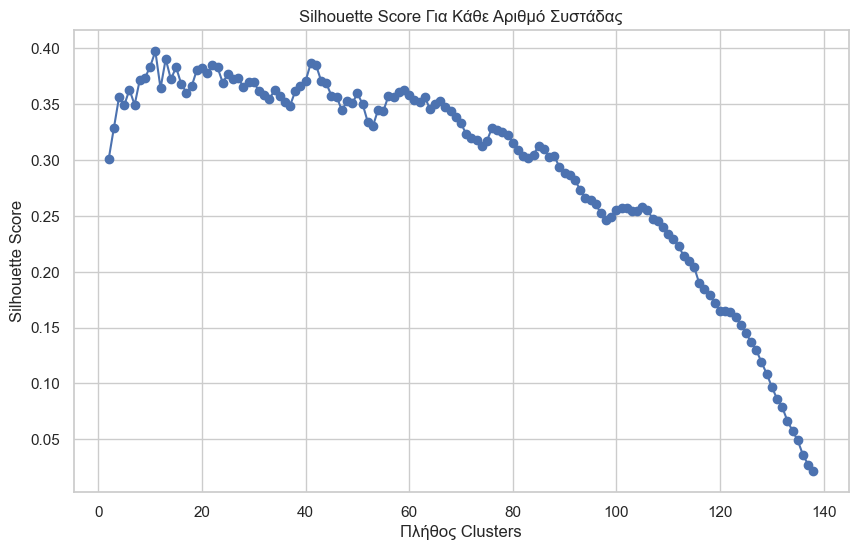

In [32]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np


range_n_clusters = range(2, 139)  # Συνολικά τα clusters που θα δοκιμάσουμε
silhouette_avg_scores = []  # Η λίστα που θα περιέχει το silhouette score για κάθε n

# Βρίσκουμε το silhouette score για κάθε n στο range_n_clusters και το κάνουμε append στο silhouette_avg_scores
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_avg_scores.append(silhouette_avg)


plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_avg_scores, marker='o')
plt.xlabel('Πλήθος Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Για Κάθε Αριθμό Συστάδας')
plt.grid(True)
plt.show()


To silhouette score για το clutering με k=11 είναι:  0.3975407387612239


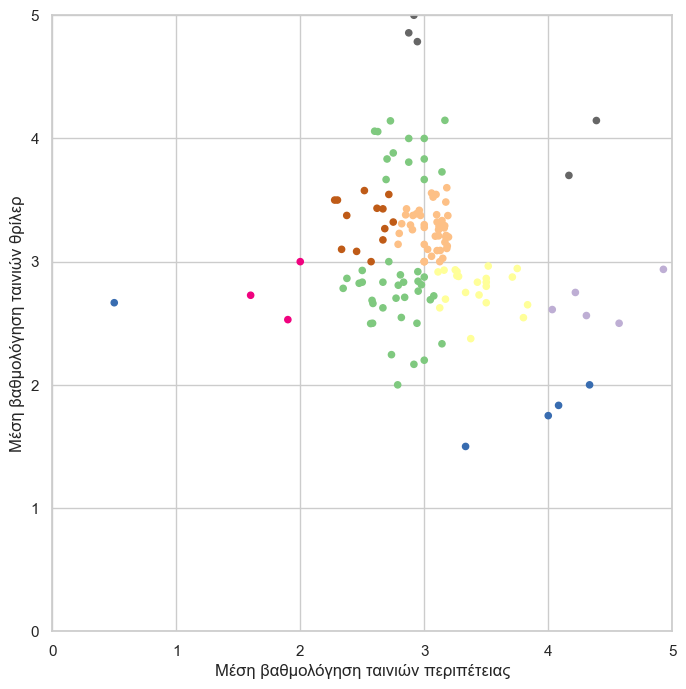

In [33]:

kmeans_1 = KMeans(n_clusters=11, random_state=42)

predictions = kmeans_1.fit_predict(X)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
plt.xlim(0, 5)
plt.ylim(0, 5)
ax.set_xlabel('Μέση βαθμολόγηση ταινιών περιπέτειας')
ax.set_ylabel('Μέση βαθμολόγηση ταινιών θρίλερ')


clustered = pd.concat([biased_dataset.reset_index(), pd.DataFrame({'group':predictions})], axis=1)
plt.scatter(clustered['averageRatingAdventure'], clustered['averageRatingThriller'], c=clustered['group'], s=20, cmap='Accent')


silhouette_avg = silhouette_score(X, predictions)

print("To silhouette score για το clutering με k=11 είναι: ", silhouette_avg)

The silhouette score for the clustering:  0.4618857650724056


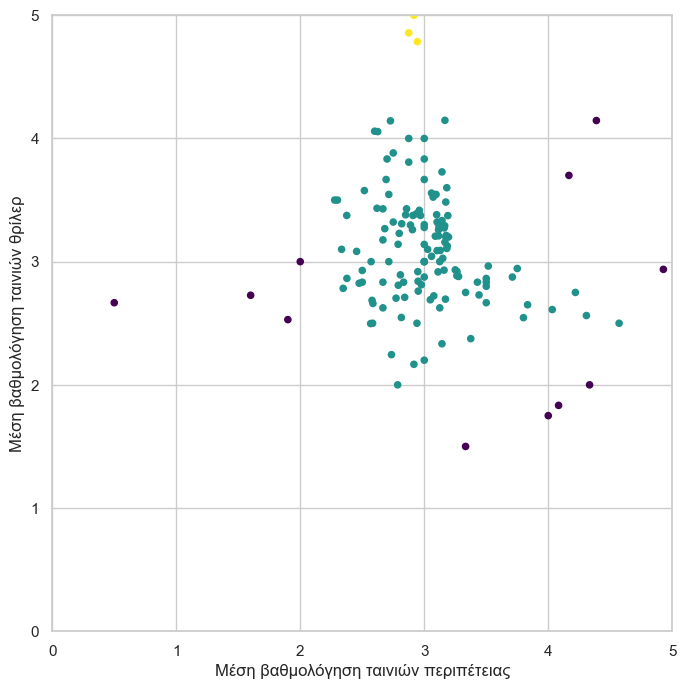

In [34]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd

# ορίζουμε epsilon 0.3 και min_samples=3. 
dbscan = DBSCAN(eps=0.3, min_samples=3)
# Εφαρμογή του αλγορίθμου 
db_predictions = dbscan.fit_predict(X)

# Εύρεση Μέσου silhouette score
silhouette_avg = silhouette_score(X, db_predictions)


fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
plt.xlim(0, 5)
plt.ylim(0, 5)
ax.set_xlabel('Μέση βαθμολόγηση ταινιών περιπέτειας')
ax.set_ylabel('Μέση βαθμολόγηση ταινιών θρίλερ')


clustered = pd.concat([biased_dataset.reset_index(), pd.DataFrame({'group':db_predictions})], axis=1)
plt.scatter(clustered['averageRatingAdventure'], clustered['averageRatingThriller'], c=clustered['group'], s=20, cmap='viridis')

# Υπολογίζουμε το silhouette score μόνο για τις περιπτώσεις όπου το db_predictions δεν είναι -1 (θόρυβος)
if len(set(db_predictions)) > 1:  # More than 1 cluster excluding noise
    silhouette_avg = silhouette_score(X, db_predictions)
    print("The silhouette score for the clustering: ", silhouette_avg)
else:
    print("Silhouette score cannot be calculated for a single cluster.")


**Διαχωρισμός συστάδων:** Στη δεύτερη γραφική παράσταση, οι συστάδες ορίζονται και διαχωρίζονται με μεγαλύτερη σαφήνεια, υποδεικνύοντας καλύτερη απόδοση ομαδοποίησης. Αυτό άλλωστε επιβεβαιώνεται και από την βαθμολογία του shilouette sxore που είναι υψηλότερη για αυτήν την της πρώτης συσταδοποίησης (k-mean).

**Θόρυβος και ακραία σημεία:** Και τα δύο σχέδια φαίνεται να έχουν κάποιο πιθανό θόρυβο ή ακραίες τιμές (σημεία που δεν ταιριάζουν καλά σε κάποια συστάδα). Ο τρόπος με τον οποίο χειρίζονται αυτά τα σημεία μπορεί να επηρεάσει την ποιότητα της συσταδοποιήσης. 
Το DBSCAN, για παράδειγμα, θα τα σημειώσει ως θόρυβο και δεν θα εντάξει σε κάποιο cluster.

**Επιπτώσεις παραμέτρων:** Οι παράμετροι eps και min_samples στον DBSCAN αλγόριθμο επηρεάζουν άμεσα το αποτέλεσμα. Εάν τo eps είναι πολύ μικρό, μπορεί να πάρουμε περισσότερο θόρυβο και πολλές μικρές συστάδες. Εάν είναι πολύ μεγάλο, διαφορετικές συστάδες ενδέχεται να συγχωνευθούν σε μία. ά.

**Αποδοτικότητα μεθόδου:** Το KMeans είναι γενικά ταχύτερο και πιο επεκτάσιμο σε μεγάλα σύνολα δεδομένων.

c:\Users\Bill\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Bill\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Bill\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Bill\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Bill\AppData\Local\Programs\Python\Python310\lib\site-package

Epoch 1/20
1008/1008 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6398 - loss: 0.8785 - val_accuracy: 0.6491 - val_loss: 0.8553
Epoch 2/20
1008/1008 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6491 - loss: 0.8491 - val_accuracy: 0.6495 - val_loss: 0.8511
Epoch 3/20
1008/1008 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6513 - loss: 0.8439 - val_accuracy: 0.6496 - val_loss: 0.8524
Epoch 4/20
1008/1008 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6507 - loss: 0.8404 - val_accuracy: 0.6466 - val_loss: 0.8535
Epoch 5/20
1008/1008 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6521 - loss: 0.8392 - val_accuracy: 0.6500 - val_loss: 0.8476
Epoch 6/20
1008/1008 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6519 - loss: 0.8362 - val_accuracy: 0.6492 - val_loss: 0.8473
Epoch 7/20
1008/1008 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6504 - loss: 0.8367 - val_accuracy: 0.6496 - val_loss: 0.8459
Epoch 8/20
1008/1008 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6501 - loss: 0.8346 - 

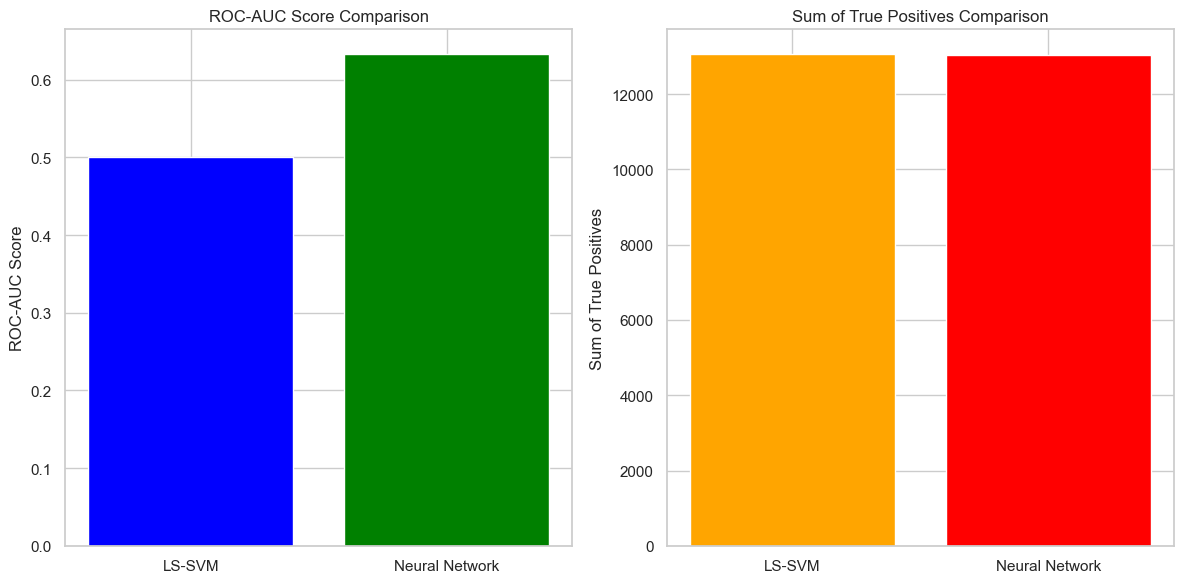

In [35]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MultiLabelBinarizer
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


data_path = 'merged_filtered_data.csv'
data = pd.read_csv(data_path)

# Μετατροπή των ειδών σε λίστες και κωδικοποίηση σε 0 και 1 (Βάζουμε 0 στα κελιά των ειδών των ταινιών που δεν ανήκουν και 1 στις ταινιές και τα είδη που ανήκουν)
data['genres_list'] = data['genres'].apply(lambda x: x.split('|'))
mlb = MultiLabelBinarizer()
genres_encoded = mlb.fit_transform(data['genres_list'])

# Kάνουμε κανονικοποίηση-διακριτοποίηση το rating για να μειώσουμε τον όγκο των δεδομένων
data['rating_class'] = pd.cut(data['rating'], bins=[0, 2, 4, 5], labels=['low', 'medium', 'high'], include_lowest=True)

# Ετοιμάζουμε το τελικό dataset που θα χρησομοποιήσουμε
processed_data = data.drop(['userId', 'movieId', 'rating', 'timestamp', 'title', 'genres', 'genres_list'], axis=1)
genres_encoded_df = pd.DataFrame(genres_encoded, columns=mlb.classes_)
rating_class_encoded = pd.get_dummies(processed_data['rating_class'], prefix='rating_class')
final_dataset = pd.concat([processed_data.drop(['rating_class'], axis=1), genres_encoded_df, rating_class_encoded], axis=1)

# Οριζουμε ετικέτες και features
X = final_dataset.drop(['rating_class_low', 'rating_class_medium', 'rating_class_high'], axis=1)
y = final_dataset[['rating_class_low', 'rating_class_medium', 'rating_class_high']]

# Διαχωρίζουμε τα data σε train και test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Κανονικοποιούμε τα features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Κάνουμε train με το LS-SVM model
model_svc = OneVsRestClassifier(LinearSVC(random_state=42))
model_svc.fit(X_train_scaled, y_train)
y_pred_svc = model_svc.predict(X_test_scaled)

# Κάνουμε train με το Neural Network model
model_nn = Sequential([
    Dense(64, input_shape=(X_train_scaled.shape[1],), activation='relu'),
    Dense(64, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')
])
model_nn.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model_nn.fit(X_train_scaled, y_train, validation_split=0.2, epochs=20, batch_size=64)

# Αξιολογούμε τα μοντέλα παίρνοντας confusion matrix και ROC-AUC score
y_pred_nn_prob = model_nn.predict(X_test_scaled)
y_pred_nn = np.argmax(y_pred_nn_prob, axis=1)

confusion_matrix_svc = confusion_matrix(y_test.values.argmax(axis=1), y_pred_svc.argmax(axis=1))
confusion_matrix_nn = confusion_matrix(y_test.values.argmax(axis=1), y_pred_nn)
roc_auc_svc = roc_auc_score(y_test, y_pred_svc, average='macro', multi_class='ovr')
roc_auc_nn = roc_auc_score(y_test, y_pred_nn_prob, average='macro', multi_class='ovr')

print("LS-SVM Confusion Matrix:\n", confusion_matrix_svc)
print("Neural Network Confusion Matrix:\n", confusion_matrix_nn)
print("LS-SVM ROC-AUC Score:", roc_auc_svc)
print("Neural Network ROC-AUC Score:", roc_auc_nn)

# Ετοιμάζουμε 2 Plots σύγκρισης
roc_auc_scores = [roc_auc_svc, roc_auc_nn]
models = ['LS-SVM', 'Neural Network']

plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
plt.bar(models, roc_auc_scores, color=['blue', 'green'])
plt.title('ROC-AUC Score Comparison')
plt.ylabel('ROC-AUC Score')

true_positives = [confusion_matrix_svc.diagonal().sum(), confusion_matrix_nn.diagonal().sum()]

plt.subplot(1, 2, 2)
plt.bar(models, true_positives, color=['orange', 'red'])
plt.title('Sum of True Positives Comparison')
plt.ylabel('Sum of True Positives')

plt.tight_layout()
plt.show()

Σύμφωνα με τα διαγράμματα μπορούμε να δούμε και γραφικά το σημαντικότερο συμπέρασμα.

Αρχικά, το μοντέλο εκπαιδεύτηκε να μπορεί να προβλέπει την κριτική ενός χρήστη με βάση τη κατηγορία της ταινίας. Στη πρώτη ράβδο (LS-SVM) βλέπουμε πως η μέθοδος των ελαχίστων τετραγώνων έχει αφήσει ένα σχεδόν άχρηστο μοντέλο με Score 0.5

Ενώ στη δεύτερη ράβδο βλέπουμε να γίνεται καλύτερη πρόβλεψη της κριτικής του χρήστη μιας και το score αγγίζει το 0.65

Φυσικά, η ακρίβεια του μοντέλου θα μπορούσε να αλλάξει αν αυξήσουμε τις εποχές κατά το training. Ωστόσο, είδαμε πως μετά από ένα σημείο η ακρίβεια σταθεροποιείται χωρίς κάποια ιδιαίτερη αύξηση.